## Distracted Driver Detection using Machine Learning techniques

### Course: Machine Learning
### Instructor:- Ifthikar Ahmed

#### Deekshith Sathrasala Gangadharaiah


## Problem Statement

Driver distraction is a leading cause of road accidents worldwide. The goal of this project is to develop a machine learning model that can accurately classify and detect various types of driver distractions using image data. By leveraging computer vision techniques, the model aims to identify activities such as texting, talking on the phone, eating, or looking away from the road. This system can be integrated into real-time vehicle monitoring solutions to enhance road safety and reduce the number of accidents caused by inattentive driving.

## 🗂️ Dataset Explanation – StateFarm Driver Distraction Detection

The dataset contains images of drivers engaged in various activities inside a car, with the goal of classifying their behavior into one of 10 distraction categories. It's used to train a model that can identify when a driver is distracted.

In [1]:
#Importing all the required libraries like image processing,looping,locating,os handling and numerical operations etc
import cv2
import itertools
import glob
import time
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from tqdm import tqdm

### Exploratory Data Analysis
### Data loading and preprocessing

#### Dataset statistics visualization which inculdes images of testing,training and validation.

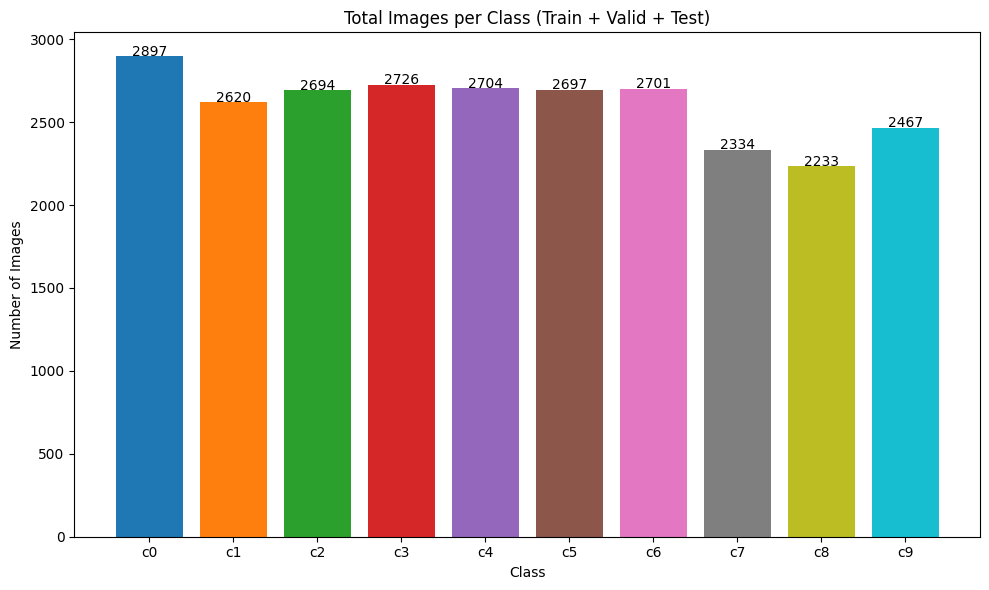

In [3]:
#This code counts the total number of images for each class across train, valid, and test folders, then visualizes these counts as a labeled bar chart
base_dir = "statefarm_data/imgs"
splits = ['train', 'valid', 'test']
class_names = [f'c{i}' for i in range(10)]

total_counts = []

for class_name in class_names:
    count = 0
    for split in splits:
        class_dir = os.path.join(base_dir, split, class_name)
        if os.path.exists(class_dir):
            count += len(os.listdir(class_dir))
    total_counts.append(count)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, total_counts, color=plt.get_cmap('tab10').colors)

plt.title('Total Images per Class (Train + Valid + Test)')
plt.xlabel('Class')
plt.ylabel('Number of Images')

# Add counts on top of bars
for bar, count in zip(bars, total_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 3, str(count), 
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [2]:
#This code loads, resizes, normalizes, and labels for all training images from each class directory into lists. 

main_path = 'statefarm_data/imgs/train/c'
class_labels = []
images = []

# Iterates for each class
for class_index in range(10):
    class_path = main_path + str(class_index)  # Path to the current class directory
    for root, dirs, files in os.walk(class_path):
        # Process files in the current class
        for filename in tqdm(files, desc='Processing class ' + str(class_index)):
            image_path = os.path.join(class_path, filename)
            img = cv2.imread(image_path)
            img = cv2.resize(img, (100, 100)) / 255
            images.append(img)
            class_labels.append(class_index)

Processing class 9: 100%|██████████████████| 1365/1365 [00:01<00:00, 904.94it/s]


### Visualization of sample images per class and Data preprocessing

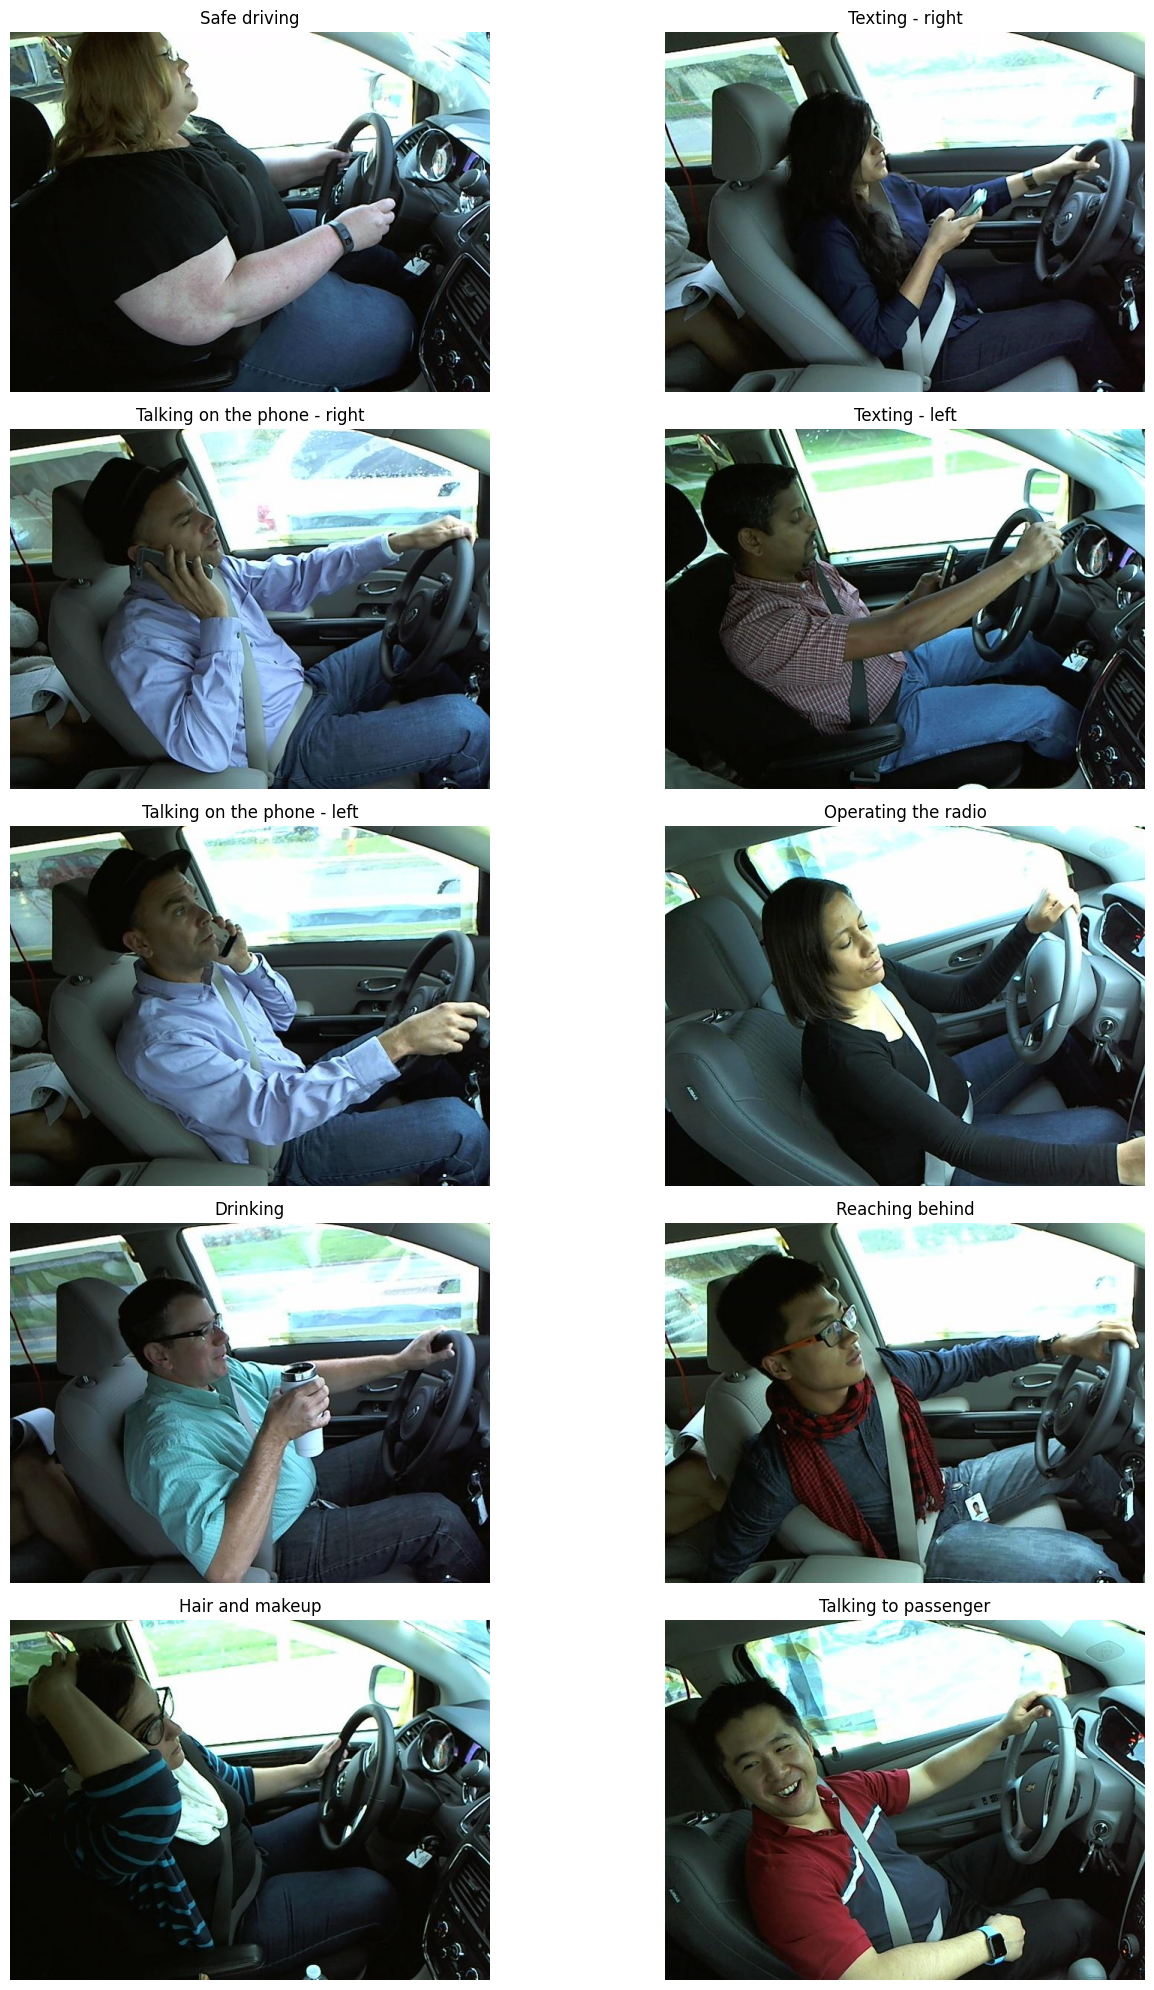

In [4]:
# This code displays the first image from each training class folder with its corresponding human-readable label in a 5x2 grid of subplots.
classes = {
    "c0": "Safe driving",
    "c1": "Texting - right",
    "c2": "Talking on the phone - right",
    "c3": "Texting - left",
    "c4": "Talking on the phone - left",
    "c5": "Operating the radio",
    "c6": "Drinking",
    "c7": "Reaching behind",
    "c8": "Hair and makeup",
    "c9": "Talking to passenger"
}

train_dir = "statefarm_data/imgs/train"

plt.figure(figsize=(15, 20))
count = 1

for directory in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, directory)
    if directory.startswith('.') or not os.path.isdir(class_path):
        continue

    files = os.listdir(class_path)
    if files:
        image_path = os.path.join(class_path, files[0]) 
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(5, 2, count)
        plt.imshow(image)
        plt.title(classes.get(directory, directory))
        plt.axis('off')
        count += 1

plt.tight_layout()
plt.show()

### Defining and Compile Custom CNN Model for Multi-Class Image Classification

In [5]:
# Define the custom CNN architecture
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/deekshithsathrasalagangadharaiah/tf_env_3_11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Spliting the image data and labels into training and test sets (80/20) and displaying summary.

In [6]:
# Assuming `images` and `class_labels` are properly aligned
train_images, test_images, train_labels, test_labels = train_test_split(
    np.array(images), np.array(class_labels), test_size=0.2, shuffle=True
)
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,404,490 (12.99 MB)

 Trainable params: 3,404,490 (12.99 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Encode the target labels as one-hot vectors and trains the CNN model on the training data for 10 epochs, validating its performance on the test data
train_labels_encoded = to_categorical(train_labels, num_classes=10)
test_labels_encoded = to_categorical(test_labels, num_classes=10)

cnn.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(test_images, test_labels_encoded))

Epoch 1/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 31s 84ms/step - accuracy: 0.4640 - loss: 1.4849 - val_accuracy: 0.9022 - val_loss: 0.3164
Epoch 2/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 42s 116ms/step - accuracy: 0.9652 - loss: 0.1228 - val_accuracy: 0.9729 - val_loss: 0.1030
Epoch 3/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 56s 156ms/step - accuracy: 0.9855 - loss: 0.0488 - val_accuracy: 0.9680 - val_loss: 0.1104
Epoch 4/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 48s 133ms/step - accuracy: 0.9909 - loss: 0.0352 - val_accuracy: 0.9635 - val_loss: 0.1367
Epoch 5/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 67s 185ms/step - accuracy: 0.9903 - loss: 0.0311 - val_accuracy: 0.9868 - val_loss: 0.0607
Epoch 6/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 73s 202ms/step - accuracy: 0.9942 - loss: 0.0192 - val_accuracy: 0.9833 - val_loss: 0.0648
Epoch 7/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 82s 228ms/step - accuracy: 0.9921 - loss: 0.0270 - val_accuracy: 0.9753 - val_loss: 0.1045
Epoch 8/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 109s 303ms/step - accuracy: 0.9955 - loss: 0

In [8]:
# Remove the last layer from the CNN model
cnn = Sequential(cnn.layers[:-1])

# Preventing the weights from being updated
for layer in cnn.layers:
    layer.trainable = False

cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,403,200 (12.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,403,200 (12.98 MB)

#### This code uses the modified CNN (without the final layer) to extract feature representations from the training and testing images by running predictions on them

In [9]:
train_features = cnn.predict(train_images)
test_features = cnn.predict(test_images)

360/360 ━━━━━━━━━━━━━━━━━━━━ 31s 85ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step


In [10]:
#print the shapes of the extracted feature arrays for the training and testing images showing the number of samples and the size of each feature vector produced by the CNN.
print(train_features.shape)
print(test_features.shape)

(11494, 128)
(2874, 128)


In [11]:
# PCA (Principal Component Analysis) class to reduce the dimensionality of data and to fit the PCA, transform data (transform), and do both in one step (fit_transform).

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Compute the mean and center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Compute covariance matrix
        cov = np.cov(X_centered, rowvar=False)

        # Eigen-decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # Sort eigenvectors by eigenvalues in descending order
        idxs = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, idxs[:self.n_components]].T

    def transform(self, X):
        # Project data onto principal components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [12]:
# Create a PCA object with 16 components
pca = PCA(n_components=16)
train_features_reduced = pca.fit_transform(train_features)
test_features_reduced = pca.transform(test_features)

In [13]:
# print the shapes of the PCA-reduced feature arrays for the training and testing sets,
print(train_features_reduced.shape)
print(test_features_reduced.shape)

(11494, 16)
(2874, 16)


## Exporting your reduced training/testing features and saving in CSV file

In [14]:
pca.fit(train_features) 
train_features_reduced_save = pd.DataFrame(train_features_reduced)
train_features_reduced_save.to_csv('train_features_reduced_save.csv', index=False)

test_features_reduced_save = pd.DataFrame(test_features_reduced)
test_features_reduced_save.to_csv('test_features_reduced_save.csv', index=False)

train_tar_save = pd.DataFrame(train_labels)
train_tar_save.to_csv('train_tar.csv', index=False)

test_tar_save = pd.DataFrame(test_labels)
test_tar_save.to_csv('test_tar.csv', index=False)

In [15]:
#train set after PCA transformation represented as a 16-dimensional vector of principal components.
print(train_features_reduced[0])

[26.79721063 12.70442687  6.51529906  3.60065456  1.50968997 -4.70665192
  7.06546985  2.39934936  8.27840249 -3.69643274  0.69454578  1.85858779
  0.9064389   0.43194901 -0.33076548 -3.48564771]


In [16]:
#test set after PCA transformation represented as a 16-dimensional vector of principal components.
print(test_features_reduced[0])

[ -7.32178982 -17.04658826   5.00517394  -1.6223934   -4.4217063
  -8.31273192  -5.73438884  -0.46580098   2.17211981  -1.76682487
  -0.93209185   0.09820484  -0.36148893   0.64064339  -0.6631459
  -1.73359931]


## SUPPORT VECTOR MACHINE

This code helps me to implement of a multi-class Support Vector Machine classifier using a dual coordinate descent algorithm and 
simplex projection to solve the constrained optimization problem.

In [17]:
class SVM:
    def __init__(self, C=1, max_iter=50, tol=0.05,
                 random_state=None, verbose=0):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol,
        self.random_state = random_state
        self.verbose = verbose

    def projection_simplex(self, v, z=1):
        n_features = v.shape[0]
        u = np.sort(v)[::-1]
        cssv = np.cumsum(u) - z
        ind = np.arange(n_features) + 1
        cond = u - cssv / ind > 0
        rho = ind[cond][-1]
        theta = cssv[cond][-1] / float(rho)
        w = np.maximum(v - theta, 0)
        return w

    def _partial_gradient(self, X, y, i):
        # Partial gradient for the ith sample.
        g = np.dot(X[i], self.coef_.T) + 1
        g[y[i]] -= 1
        return g

    def _violation(self, g, y, i):
        # Optimality violation for the ith sample.
        smallest = np.inf
        for k in range(g.shape[0]):
            if k == y[i] and self.dual_coef_[k, i] >= self.C:
                continue
            elif k != y[i] and self.dual_coef_[k, i] >= 0:
                continue

            smallest = min(smallest, g[k])

        return g.max() - smallest

    def _solve_subproblem(self, g, y, norms, i):
        # Prepare inputs to the projection.
        Ci = np.zeros(g.shape[0])
        Ci[y[i]] = self.C
        beta_hat = norms[i] * (Ci - self.dual_coef_[:, i]) + g / norms[i]
        z = self.C * norms[i]

        # Compute projection onto the simplex.
        beta = self.projection_simplex(beta_hat, z)

        return Ci - self.dual_coef_[:, i] - beta / norms[i]

    def fit(self, X, y):
        n_samples, n_features = X.shape

        n_classes = np.unique(y).size
        self.dual_coef_ = np.zeros((n_classes, n_samples), dtype=np.float64)
        self.coef_ = np.zeros((n_classes, n_features))

        # Pre-compute norms.
        norms = np.sqrt(np.sum(X ** 2, axis=1))

        # Shuffle sample indices.
        rs = check_random_state(self.random_state)
        ind = np.arange(n_samples)
        rs.shuffle(ind)

        violation_init = None
        for it in range(self.max_iter):
            violation_sum = 0

            for ii in range(n_samples):
                i = ind[ii]

                # All-zero samples can be safely ignored.
                if norms[i] == 0:
                    continue

                g = self._partial_gradient(X, y, i)
                v = self._violation(g, y, i)
                violation_sum += v

                if v < 1e-12:
                    continue

                # Solve subproblem for the ith sample.
                delta = self._solve_subproblem(g, y, norms, i)

                # Update primal and dual coefficients.
                self.coef_ = self.coef_.astype(np.complex128)
                self.dual_coef_ = self.dual_coef_.astype(np.complex128)
                delta = delta.astype(np.complex128)

                self.coef_ += np.multiply(delta[:, np.newaxis], X[i][:, np.newaxis].conj().T)
                self.dual_coef_[:, i] += delta

            if it == 0:
                violation_init = violation_sum

            vratio = violation_sum / violation_init

            if vratio < self.tol:
                if self.verbose >= 1:
                    print("Converged")
                break

        return self

    def predict(self, X):
        decision = np.dot(X, self.coef_.T)
        return decision.argmax(axis=1)

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier with a linear kernel
svm_sklearn = SVC(kernel='linear', C=1, max_iter=100, random_state=0, verbose=0)

# Train the SVM classifier on the reduced features (with PCA)
start_time_svm_sklearn = time.time()
svm_sklearn.fit(train_features_reduced, train_labels)
end_time_svm_sklearn = time.time()

training_duration_svm_sklearn = end_time_svm_sklearn- start_time_svm_sklearn
print("Training duration with PCA:", training_duration_svm_sklearn, "seconds")

# Predict the labels for the test set
predictions_svm_sklearn = svm_sklearn.predict(test_features_reduced)
accuracy_svm_sklearn = accuracy_score(test_labels, predictions_svm_sklearn)
print("Accuracy with PCA:", accuracy_svm_sklearn)

Training duration with PCA: 0.05045032501220703 seconds
Accuracy with PCA: 0.9902574808629089


/Users/deekshithsathrasalagangadharaiah/tf_env_3_11/lib/python3.11/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [77]:
# Train the SVM classifier on the original features (without PCA)
start_time_svm_sklearn_no_pca = time.time()
svm_sklearn.fit(train_features, train_labels)
end_time_svm_sklearn_no_pca = time.time()

training_duration_svm_sklearn_no_pca = end_time_svm_sklearn_no_pca - start_time_svm_sklearn_no_pca
print("Training duration without PCA:", training_duration_svm_sklearn_no_pca, "seconds")

# Predict the labels for the test set
predictions_svm_sklearn_no_pca = svm_sklearn.predict(test_features)
accuracy_svm_sklearn_no_pca = accuracy_score(test_labels, predictions_svm_sklearn_no_pca)
print("Accuracy without PCA:", accuracy_svm_sklearn_no_pca)

Training duration without PCA: 0.10143113136291504 seconds
Accuracy without PCA: 0.9926931106471816


/Users/deekshithsathrasalagangadharaiah/tf_env_3_11/lib/python3.11/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [18]:
svm = SVM(C=1, tol=0.001, max_iter=100, random_state=0, verbose=1)

start_time = time.time()
svm.fit(train_features_reduced, train_labels)
end_time = time.time()

training_duration = end_time - start_time
print("Training duration:", training_duration, "seconds")

predictions = svm.predict(test_features_reduced)
accuracy = np.mean(predictions == test_labels)
print("Accuracy:", accuracy)

Training duration: 37.1689989566803 seconds
Accuracy: 0.9906054279749478


In [19]:
svm_no_pca = SVM(C=1, tol=0.001, max_iter=100, random_state=0, verbose=1)

start_time_no_pca = time.time()
svm_no_pca.fit(train_features, train_labels)
end_time_no_pca = time.time()

training_duration_no_pca = end_time_no_pca - start_time_no_pca
print("Training duration without PCA:", training_duration_no_pca, "seconds")

predictions_no_pca = svm_no_pca.predict(test_features)
accuracy_no_pca = np.mean(predictions_no_pca == test_labels)
print("Accuracy without PCA:", accuracy_no_pca)

Training duration without PCA: 51.147961139678955 seconds
Accuracy without PCA: 0.9933890048712596


In [20]:
# Displays a confusion matrix as a heatmap to visualize model performance, optionally normalized by class
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    #print(cm)
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix


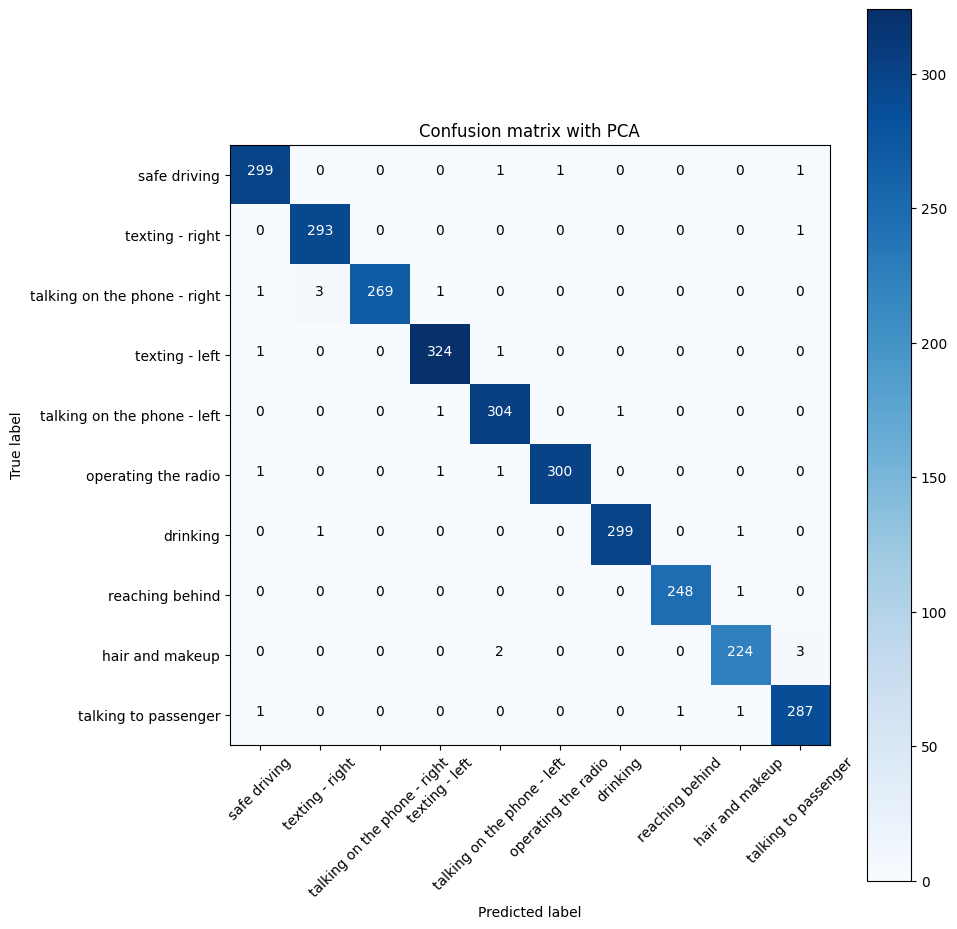

In [21]:
# Compute and plot the confusion matrix for SVM predictions on PCA-reduced test data
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_labels, predictions)
np.set_printoptions(precision=2)

class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 
               'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger']

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix with PCA')
plt.show()


Confusion matrix


<Figure size 640x480 with 0 Axes>

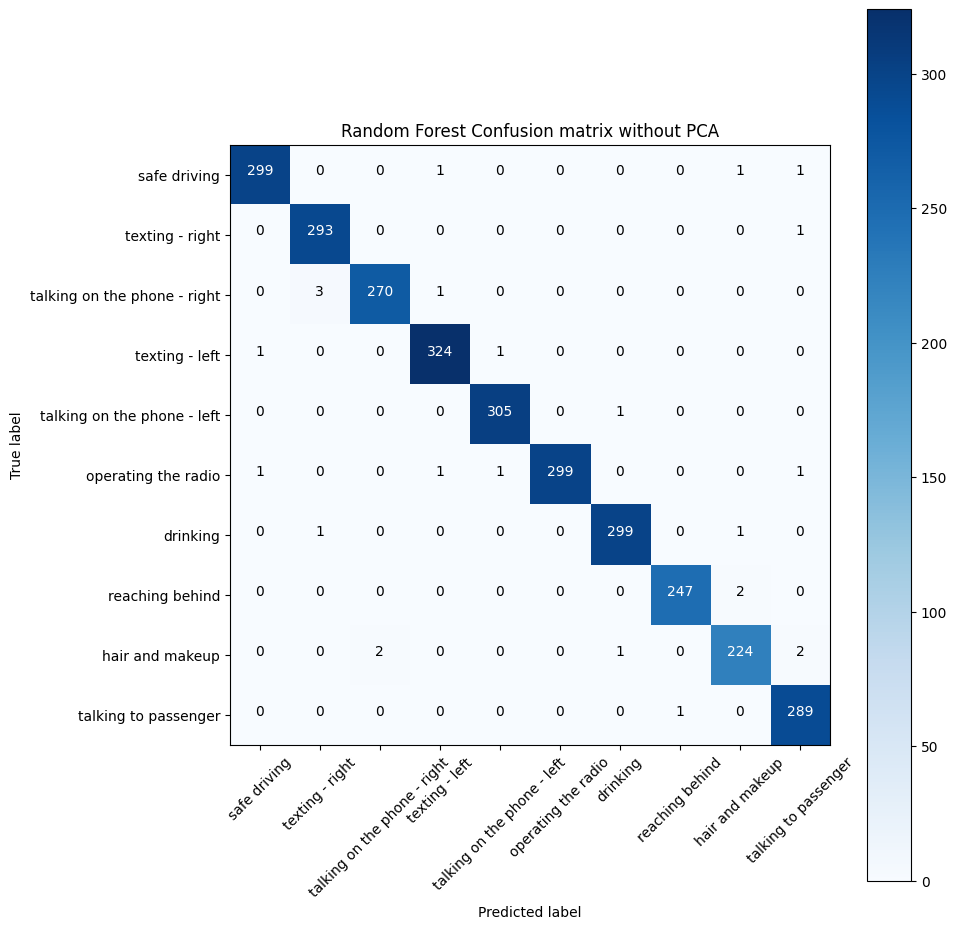

In [34]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, predictions_rf_no_pca)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind',
               'hair and makeup', 'talking to passenger']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest Confusion matrix without PCA')

Confusion matrix


<Figure size 640x480 with 0 Axes>

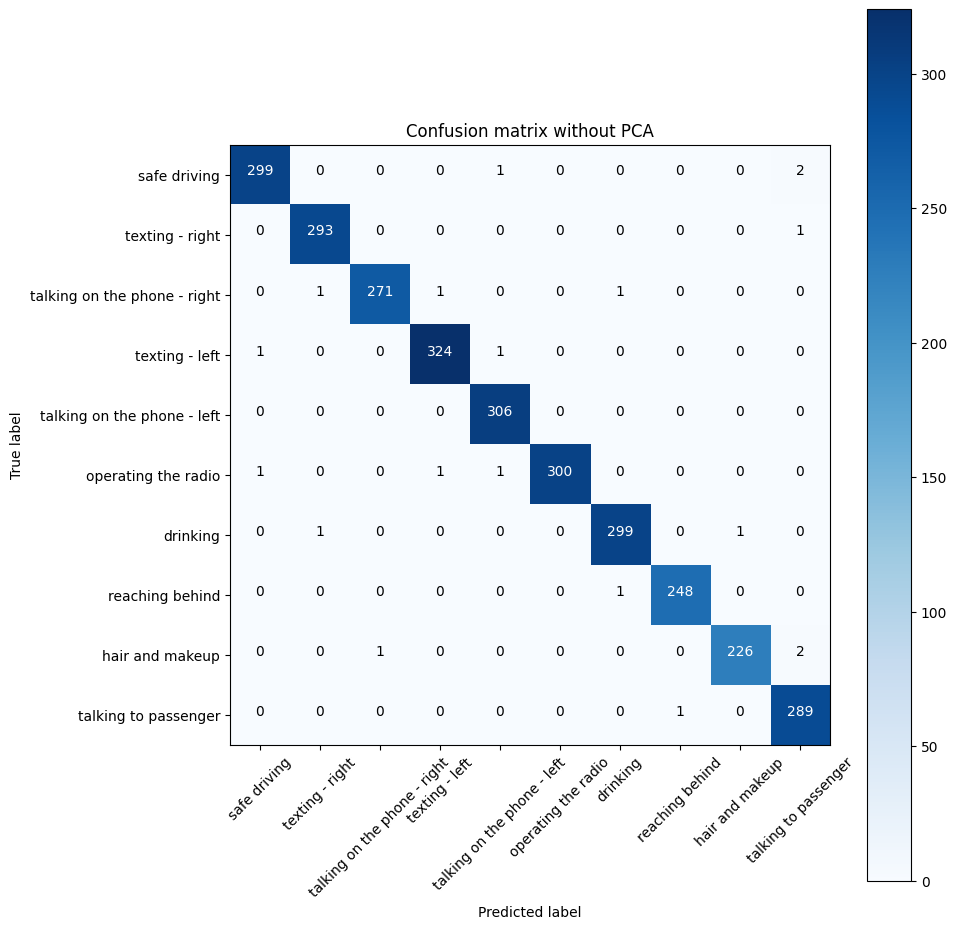

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, predictions_no_pca)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind',
               'hair and makeup', 'talking to passenger']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix without PCA')

In [23]:
# Generate and print a detailed classification report showing precision, recall, f1-score, and support for each class
from sklearn.metrics import confusion_matrix, classification_report

y_true = test_labels
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left',
               'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger']

print(classification_report(y_true, predictions, target_names=class_names))


                              precision    recall  f1-score   support

                safe driving       0.99      0.99      0.99       302
             texting - right       0.99      1.00      0.99       294
talking on the phone - right       1.00      0.98      0.99       274
              texting - left       0.99      0.99      0.99       326
 talking on the phone - left       0.98      0.99      0.99       306
         operating the radio       1.00      0.99      0.99       303
                    drinking       1.00      0.99      1.00       301
             reaching behind       1.00      1.00      1.00       249
             hair and makeup       0.99      0.98      0.98       229
        talking to passenger       0.98      0.99      0.99       290

                    accuracy                           0.99      2874
                   macro avg       0.99      0.99      0.99      2874
                weighted avg       0.99      0.99      0.99      2874



In [24]:
# Generate classification report for predictions using the original (non-PCA) features, showing performance per class
from sklearn.metrics import confusion_matrix, classification_report

y_true = test_labels
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left',
               'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger']

print(classification_report(y_true, predictions_no_pca, target_names=class_names))


                              precision    recall  f1-score   support

                safe driving       0.99      0.99      0.99       302
             texting - right       0.99      1.00      0.99       294
talking on the phone - right       1.00      0.99      0.99       274
              texting - left       0.99      0.99      0.99       326
 talking on the phone - left       0.99      1.00      1.00       306
         operating the radio       1.00      0.99      1.00       303
                    drinking       0.99      0.99      0.99       301
             reaching behind       1.00      1.00      1.00       249
             hair and makeup       1.00      0.99      0.99       229
        talking to passenger       0.98      1.00      0.99       290

                    accuracy                           0.99      2874
                   macro avg       0.99      0.99      0.99      2874
                weighted avg       0.99      0.99      0.99      2874



## K-Nearest Neighbors (KNN) Classification on PCA-Reduced Features and NO-PCA

#### KNN classifies distracted driver behaviors by assigning the label of the majority among the k-nearest training samples based on feature similarity, optionally improved by PCA and NO-PCA for faster, cleaner distance calculations.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the reduced features(with PCA)
start_time_knn = time.time()
knn.fit(train_features_reduced, train_labels)
end_time_knn = time.time() 

training_duration_knn = end_time_knn - start_time_knn
print("Training duration with PCA:", training_duration_knn, "seconds")

# Predict the labels for the test set
predictions_knn = knn.predict(test_features_reduced)
accuracy_knn = np.mean(predictions_knn == test_labels)
print("Accuracy with PCA:", accuracy_knn)

Training duration with PCA: 0.0030448436737060547 seconds


Python(30723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Accuracy with PCA: 0.9926931106471816


In [26]:
# Train the KNN classifier on the original features(without PCA)
start_time_knn_no_pca = time.time()
knn.fit(train_features, train_labels)
end_time_knn_no_pca = time.time()

training_duration_knn_no_pca = end_time_knn_no_pca - start_time_knn_no_pca
print("Training duration without PCA:", training_duration_knn_no_pca, "seconds")

# Predict the labels for the test set
predictions_knn_no_pca = knn.predict(test_features)
accuracy_knn_no_pca = np.mean(predictions_knn_no_pca == test_labels)
print("Accuracy without PCA:", accuracy_knn_no_pca)

Training duration without PCA: 0.005215883255004883 seconds
Accuracy without PCA: 0.9923451635351427


Confusion matrix


<Figure size 640x480 with 0 Axes>

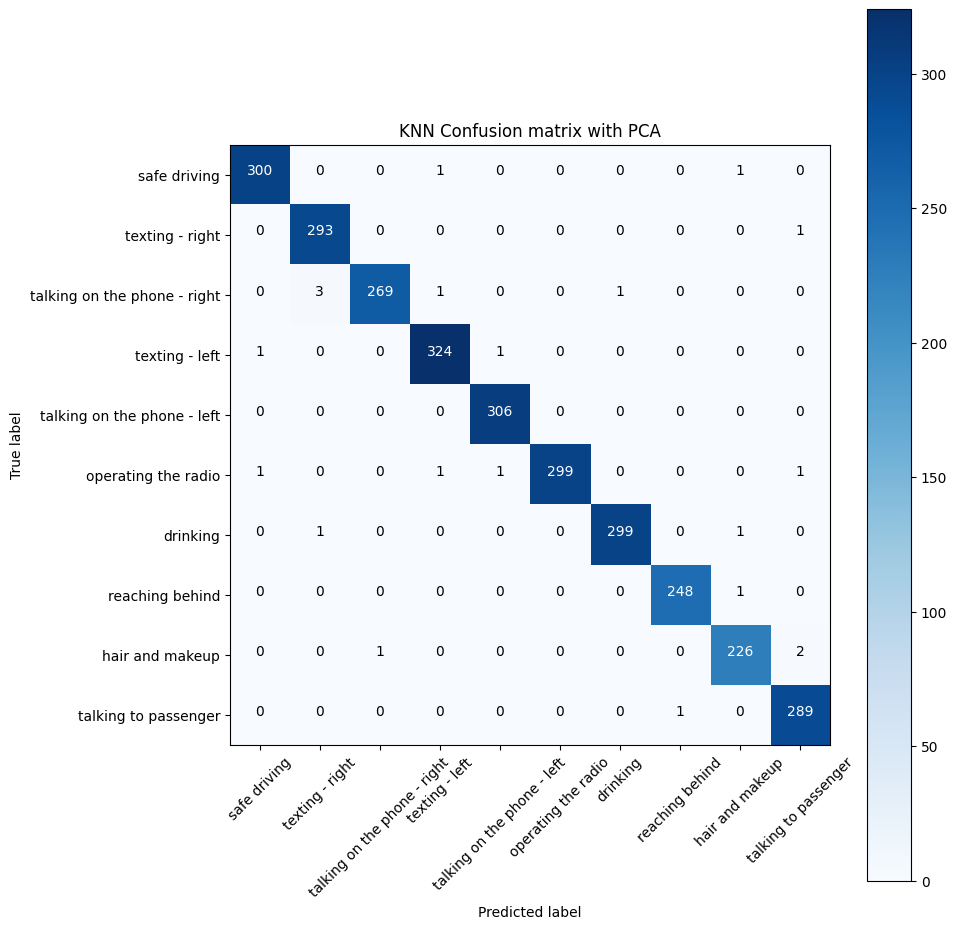

In [27]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, predictions_knn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind',
               'hair and makeup', 'talking to passenger']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='KNN Confusion matrix with PCA')

Confusion matrix


<Figure size 640x480 with 0 Axes>

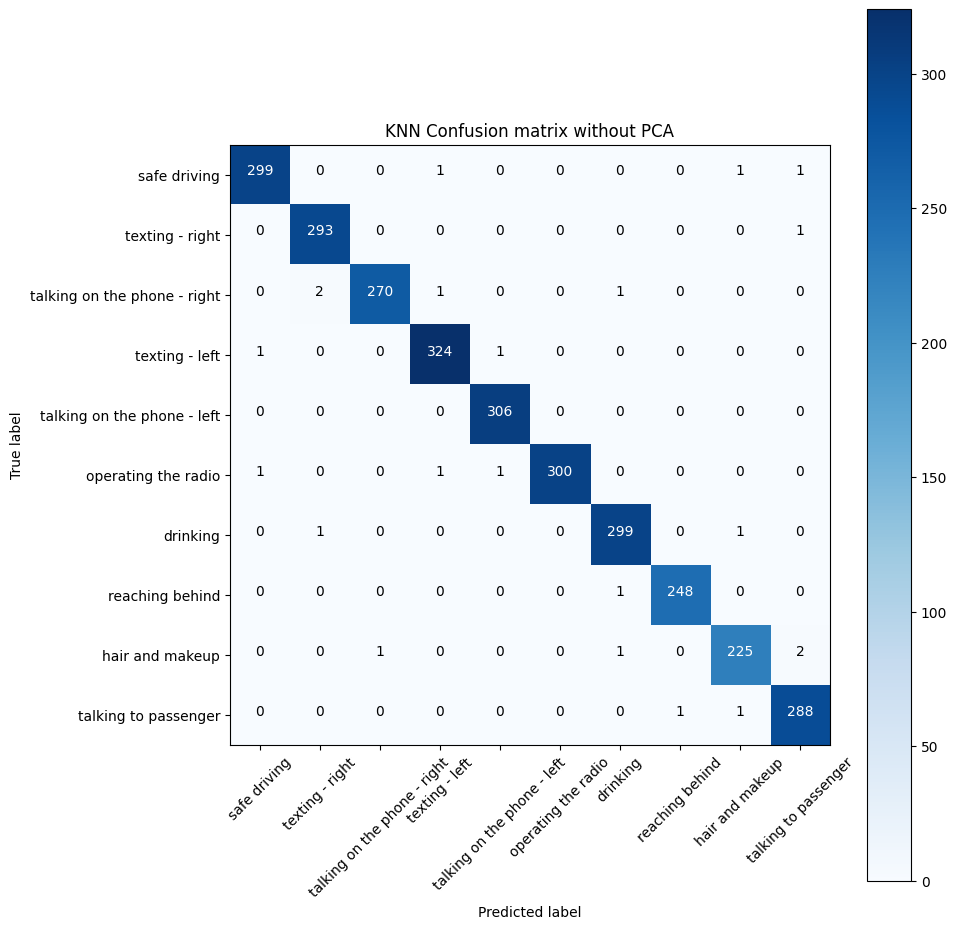

In [28]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, predictions_knn_no_pca)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind',
               'hair and makeup', 'talking to passenger']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='KNN Confusion matrix without PCA')

In [29]:
#classification report
from sklearn.metrics import confusion_matrix, classification_report
y_true = test_labels
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind',
               'hair and makeup', 'talking to passenger']
print(classification_report(y_true, predictions_knn, target_names = class_names))

                              precision    recall  f1-score   support

                safe driving       0.99      0.99      0.99       302
             texting - right       0.99      1.00      0.99       294
talking on the phone - right       1.00      0.98      0.99       274
              texting - left       0.99      0.99      0.99       326
 talking on the phone - left       0.99      1.00      1.00       306
         operating the radio       1.00      0.99      0.99       303
                    drinking       1.00      0.99      1.00       301
             reaching behind       1.00      1.00      1.00       249
             hair and makeup       0.99      0.99      0.99       229
        talking to passenger       0.99      1.00      0.99       290

                    accuracy                           0.99      2874
                   macro avg       0.99      0.99      0.99      2874
                weighted avg       0.99      0.99      0.99      2874



In [30]:
#classification report
from sklearn.metrics import confusion_matrix, classification_report
y_true = test_labels
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind',
               'hair and makeup', 'talking to passenger']
print(classification_report(y_true, predictions_knn_no_pca, target_names = class_names))

                              precision    recall  f1-score   support

                safe driving       0.99      0.99      0.99       302
             texting - right       0.99      1.00      0.99       294
talking on the phone - right       1.00      0.99      0.99       274
              texting - left       0.99      0.99      0.99       326
 talking on the phone - left       0.99      1.00      1.00       306
         operating the radio       1.00      0.99      1.00       303
                    drinking       0.99      0.99      0.99       301
             reaching behind       1.00      1.00      1.00       249
             hair and makeup       0.99      0.98      0.98       229
        talking to passenger       0.99      0.99      0.99       290

                    accuracy                           0.99      2874
                   macro avg       0.99      0.99      0.99      2874
                weighted avg       0.99      0.99      0.99      2874



## Random Forest Classification on PCA-Reduced Features and No-PCA

This code trains a Random Forest classifier on PCA-reduced training features, measures the training time, then predicts the test labels and calculates the accuracy to evaluate the model’s performance.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the Random Forest classifier on the reduced features(with PCA)
start_time_rf = time.time()
rf.fit(train_features_reduced, train_labels)
end_time_rf = time.time()

training_duration_rf = end_time_rf - start_time_rf
print("Training duration with PCA:", training_duration_rf, "seconds")

# Predict the labels for the test set
predictions_rf = rf.predict(test_features_reduced)
accuracy_rf = accuracy_score(test_labels, predictions_rf)
print("Accuracy with PCA:", accuracy_rf)

Training duration with PCA: 12.730161905288696 seconds
Accuracy with PCA: 0.9919972164231037


In [32]:
# Train the Random Forest classifier on the original features(without PCA)
start_time_rf_no_pca = time.time()
rf.fit(train_features, train_labels)
end_time_rf_no_pca = time.time()

training_duration_rf_no_pca = end_time_rf_no_pca - start_time_rf_no_pca
print("Training duration without PCA:", training_duration_rf_no_pca, "seconds")

# Predict the labels for the test set
predictions_rf_no_pca = rf.predict(test_features)
accuracy_rf_no_pca = accuracy_score(test_labels, predictions_rf_no_pca)
print("Accuracy without PCA:", accuracy_rf_no_pca)

Training duration without PCA: 13.08762502670288 seconds
Accuracy without PCA: 0.9913013221990258


Confusion matrix


<Figure size 640x480 with 0 Axes>

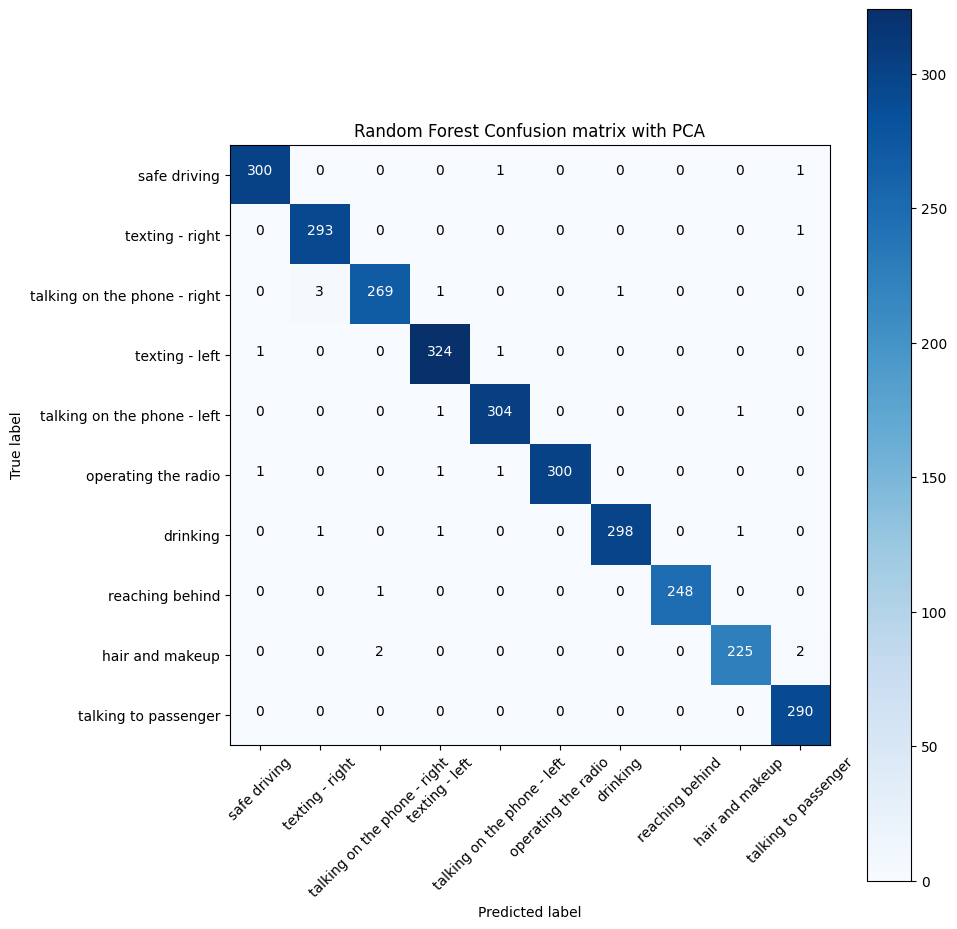

In [33]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, predictions_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind',
               'hair and makeup', 'talking to passenger']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest Confusion matrix with PCA')

Confusion matrix


<Figure size 640x480 with 0 Axes>

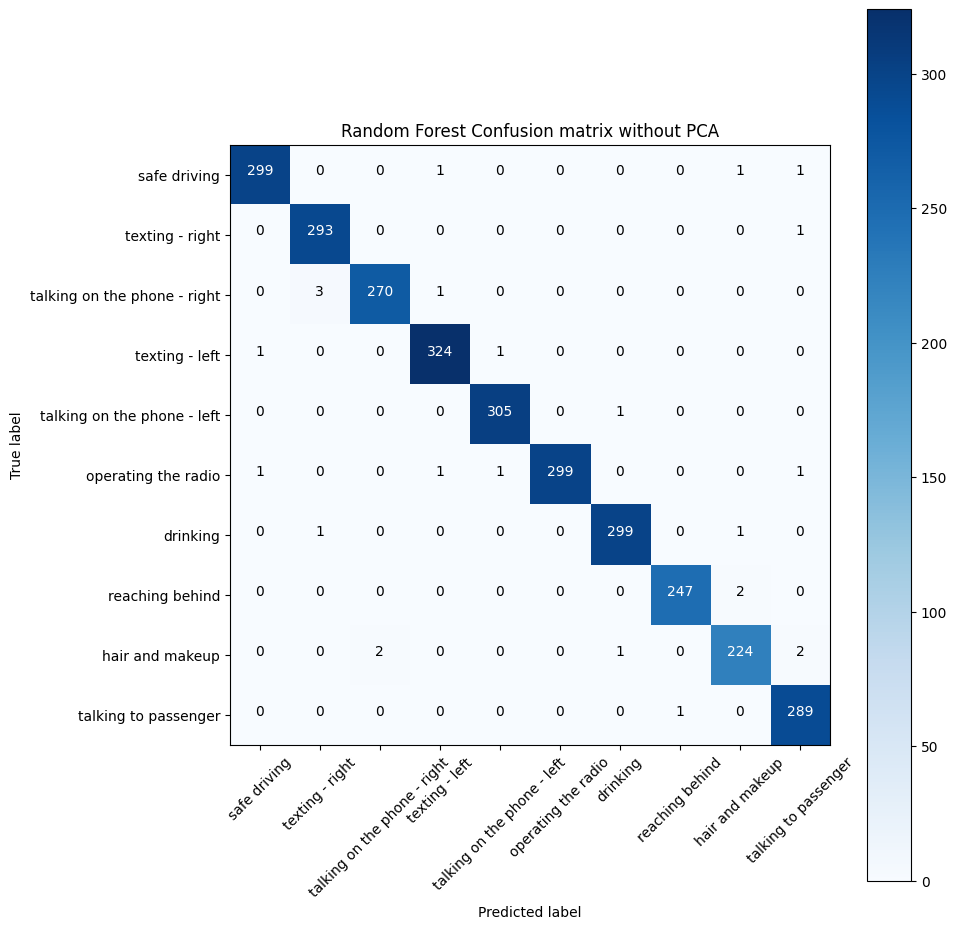

In [34]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, predictions_rf_no_pca)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind',
               'hair and makeup', 'talking to passenger']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest Confusion matrix without PCA')

In [35]:
#classification report
from sklearn.metrics import confusion_matrix, classification_report
y_true = test_labels
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind',
               'hair and makeup', 'talking to passenger']
print(classification_report(y_true, predictions_rf, target_names = class_names))

                              precision    recall  f1-score   support

                safe driving       0.99      0.99      0.99       302
             texting - right       0.99      1.00      0.99       294
talking on the phone - right       0.99      0.98      0.99       274
              texting - left       0.99      0.99      0.99       326
 talking on the phone - left       0.99      0.99      0.99       306
         operating the radio       1.00      0.99      1.00       303
                    drinking       1.00      0.99      0.99       301
             reaching behind       1.00      1.00      1.00       249
             hair and makeup       0.99      0.98      0.99       229
        talking to passenger       0.99      1.00      0.99       290

                    accuracy                           0.99      2874
                   macro avg       0.99      0.99      0.99      2874
                weighted avg       0.99      0.99      0.99      2874



In [36]:
#classification report
from sklearn.metrics import confusion_matrix, classification_report
y_true = test_labels
class_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind',
               'hair and makeup', 'talking to passenger']
print(classification_report(y_true, predictions_rf_no_pca, target_names = class_names))

                              precision    recall  f1-score   support

                safe driving       0.99      0.99      0.99       302
             texting - right       0.99      1.00      0.99       294
talking on the phone - right       0.99      0.99      0.99       274
              texting - left       0.99      0.99      0.99       326
 talking on the phone - left       0.99      1.00      1.00       306
         operating the radio       1.00      0.99      0.99       303
                    drinking       0.99      0.99      0.99       301
             reaching behind       1.00      0.99      0.99       249
             hair and makeup       0.98      0.98      0.98       229
        talking to passenger       0.98      1.00      0.99       290

                    accuracy                           0.99      2874
                   macro avg       0.99      0.99      0.99      2874
                weighted avg       0.99      0.99      0.99      2874



## Comparison of Model Accuracies With and Without PCA of different model

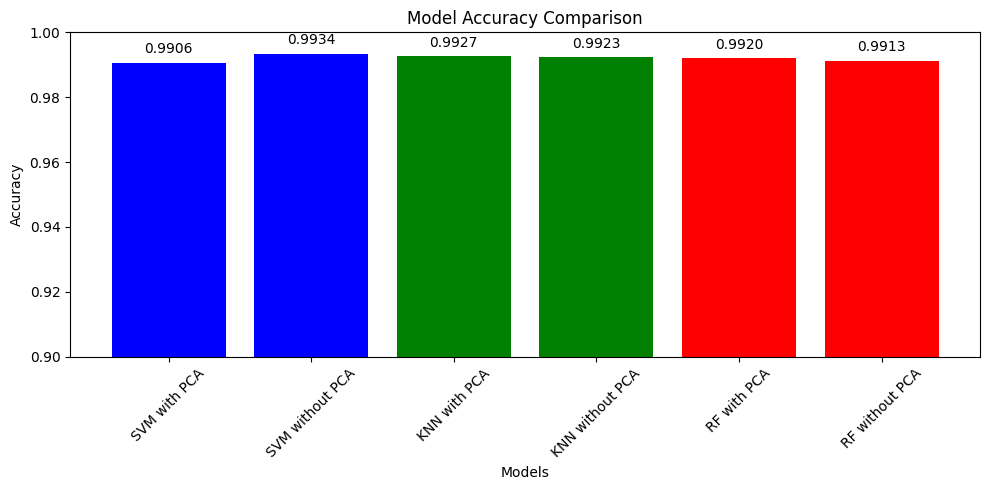

In [38]:
import matplotlib.pyplot as plt

# Model names
models = ['SVM with PCA', 'SVM without PCA', 'KNN with PCA', 'KNN without PCA', 'RF with PCA', 'RF without PCA']

# Accuracy values (use raw accuracies without subtracting 0.03)
accuracies = [accuracy, accuracy_no_pca, accuracy_knn, accuracy_knn_no_pca, accuracy_rf, accuracy_rf_no_pca]

# Training durations
training_durations = [training_duration, training_duration_no_pca, training_duration_knn, training_duration_knn_no_pca, training_duration_rf, training_duration_no_pca]

# Plotting accuracies
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'blue', 'green', 'green', 'red', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.90, 1)  # Adjust y-axis for better visibility

# Adding accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.002, f"{v:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Visualizing Sample Images from Each Class with Predicted Labels Using CNN Features, PCA, and SVM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


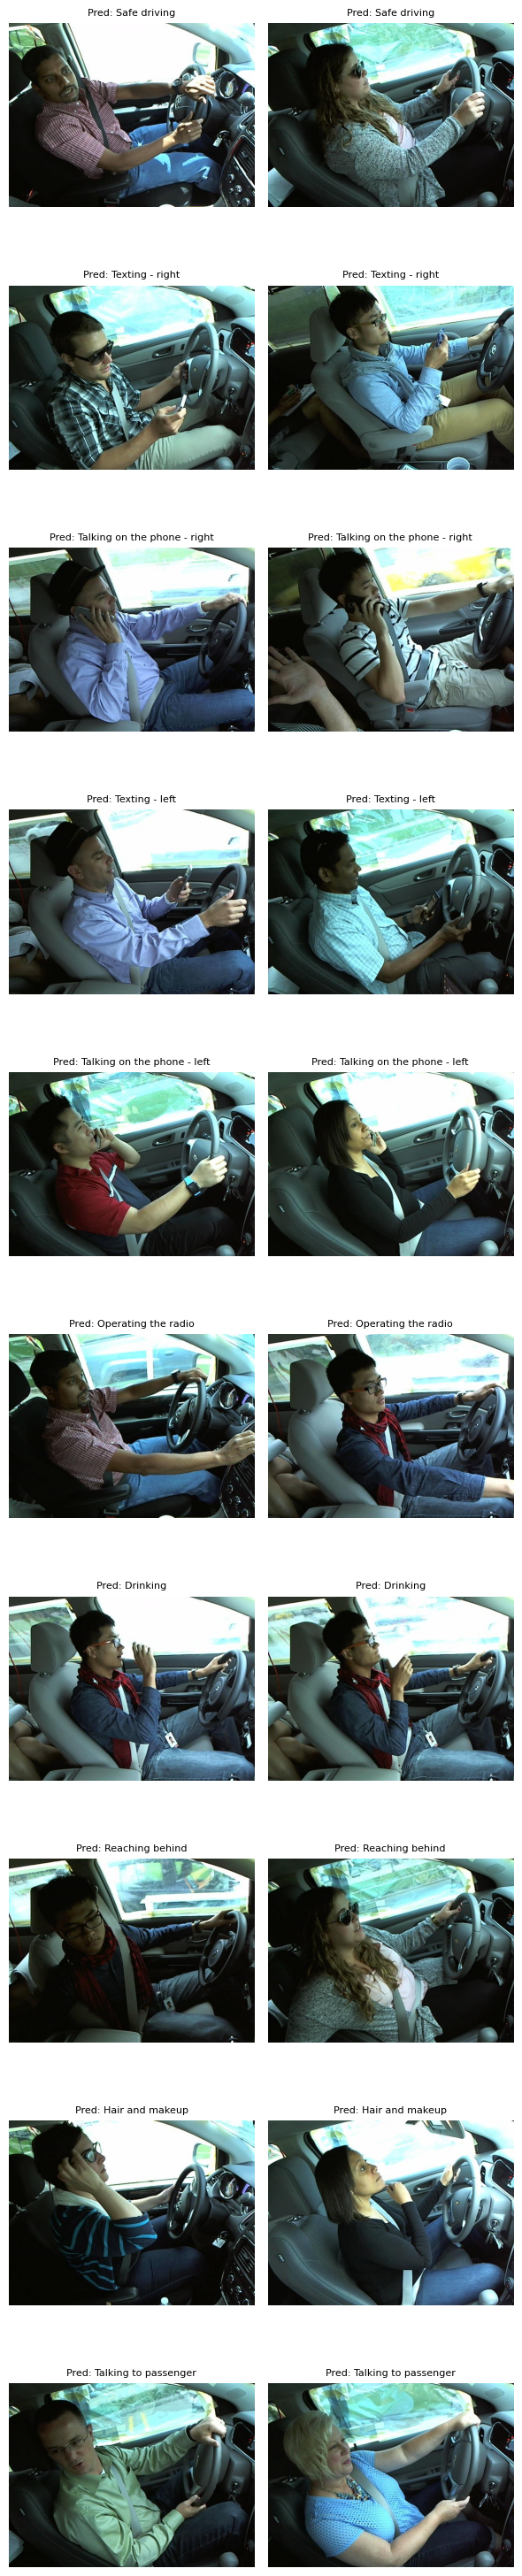

In [129]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob

# Define the class names and folder labels
class_names_folder = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
class_names = ['Safe driving', 'Texting - right', 'Talking on the phone - right', 'Texting - left',
               'Talking on the phone - left', 'Operating the radio', 'Drinking', 'Reaching behind',
               'Hair and makeup', 'Talking to passenger']

# Number of images to display from each class
num_images_per_class = 2

# Set figure size
fig, axes = plt.subplots(len(class_names_folder), num_images_per_class, figsize=(num_images_per_class*3, len(class_names_folder)*3))

for row, class_label in enumerate(class_names_folder):
    # Get image paths
    image_paths = glob.glob(f'statefarm_data/imgs/train/{class_label}/*.jpg')
    
    if len(image_paths) < num_images_per_class:
        print(f"Not enough images in {class_label}")
        continue
    
    # Select images
    selected_image_paths = np.random.choice(image_paths, size=num_images_per_class, replace=False)

    for col, image_path in enumerate(selected_image_paths):
        img = cv2.imread(image_path)
        img_resized = cv2.resize(img, (100, 100)) / 256.0
        input_img = np.array([img_resized])

        # Predict
        features = cnn.predict(input_img)
        reduced = pca.transform(features)
        prediction = svm.predict(reduced)

        # Plot
        ax = axes[row, col]
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(f"Pred: {class_names[prediction[0]]}", fontsize=8)
        ax.axis('off')

plt.tight_layout()
plt.show()

## Displaying sample images from each class with predicted labels using CNN features and the custom SVM model without PCA

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


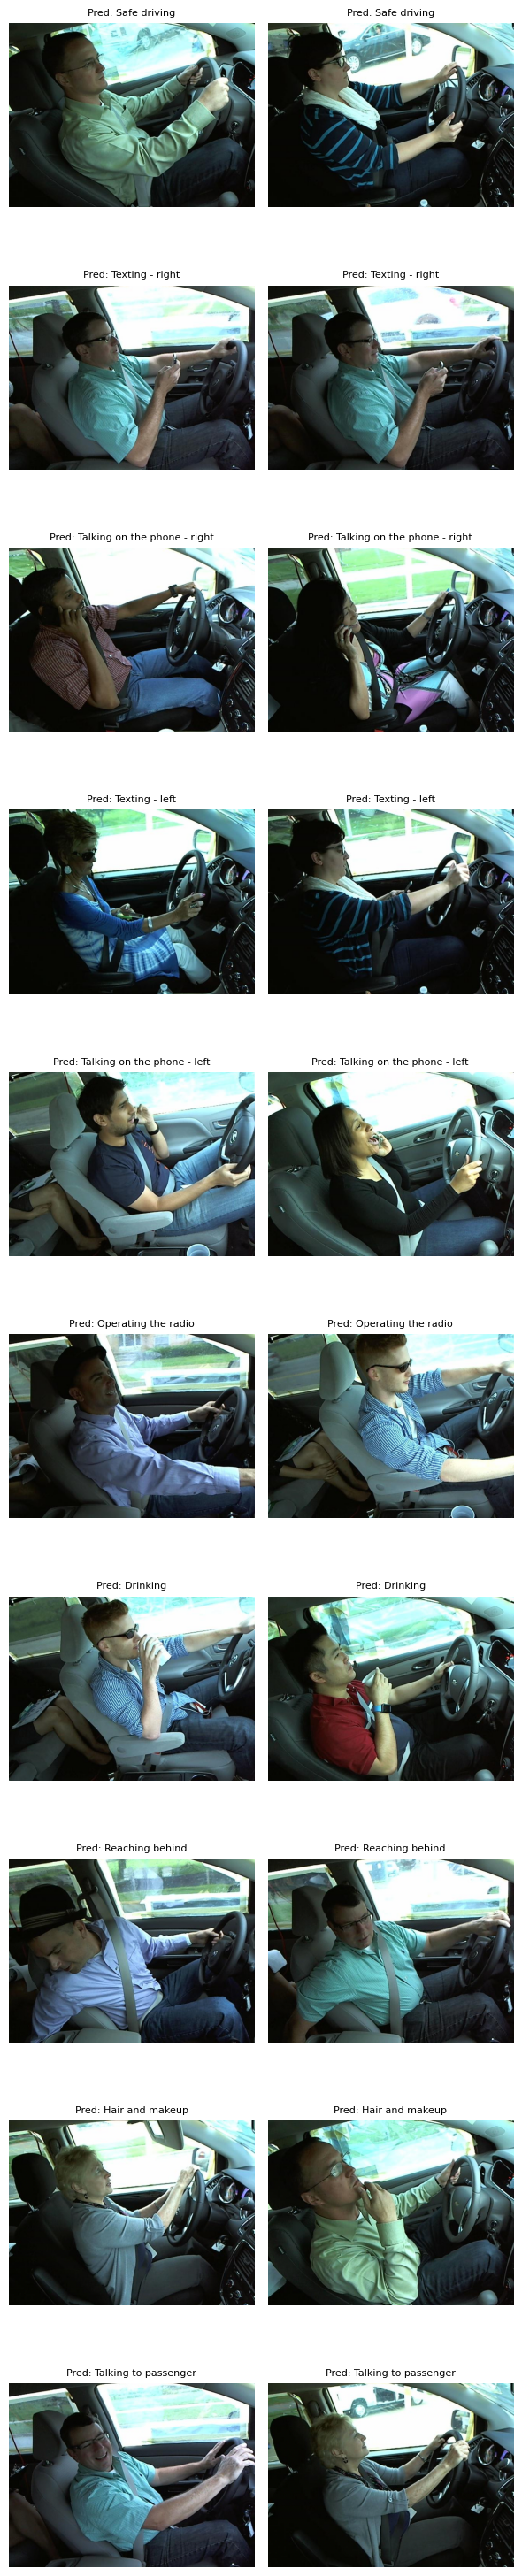

In [102]:
# Number of images to display from each class
num_images_per_class = 2

# Prepare the grid layout
fig, axes = plt.subplots(len(class_names_folder), num_images_per_class, figsize=(num_images_per_class * 3, len(class_names_folder) * 3))

for row, class_label in enumerate(class_names_folder):
    # Get image paths
    image_paths = glob.glob(f'statefarm_data/imgs/train/{class_label}/*.jpg')

    if len(image_paths) < num_images_per_class:
        print(f"Not enough images in {class_label}")
        continue

    # Randomly select images
    selected_image_paths = np.random.choice(image_paths, size=num_images_per_class, replace=False)

    for col, image_path in enumerate(selected_image_paths):
        # Load and preprocess image
        img = cv2.imread(image_path)
        img_resized = cv2.resize(img, (100, 100)) / 256.0
        input_img = np.array([img_resized])

        # Predict without PCA
        prediction = svm_no_pca.predict(cnn.predict(input_img))

        # Plot image
        ax = axes[row, col]
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(f"Pred: {class_names[prediction[0]]}", fontsize=8)
        ax.axis('off')

plt.tight_layout()
plt.show()


## Conculsion:

In this project, we implemented a driver behavior classification system using a combination of deep learning-based feature extraction and traditional machine learning for classification.

We began by using a pre-trained Convolutional Neural Network (CNN) to extract high-level features from images representing different driving postures (e.g., safe driving, texting, talking, etc.). These features were then reduced using Principal Component Analysis (PCA) to retain the most significant components while reducing dimensionality and noise.

In [126]:
import ipywidgets as widgets
from IPython.display import display

# Upload widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)


FileUpload(value=(), accept='image/*', description='Upload')

In [127]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Class mapping
classes = {
    0: "Safe driving",
    1: "Texting - right",
    2: "Talking on the phone - right",
    3: "Texting - left",
    4: "Talking on the phone - left",
    5: "Operating the radio",
    6: "Drinking",
    7: "Reaching behind",
    8: "Hair and makeup",
    9: "Talking to passenger"
}

def predict_uploaded_image(uploader, cnn, pca, svm):
    if uploader.value:
        uploaded_file = uploader.value[0]  # <-- Corrected line
        filename = uploaded_file['metadata']['name'] if 'metadata' in uploaded_file else uploaded_file['name']
        content = uploaded_file['content']

        # Save the uploaded image temporarily
        with open(filename, 'wb') as f:
            f.write(content)

        # Read and preprocess image
        img = cv2.imread(filename)
        if img is None:
            print("❌ Error: Couldn't read the image.")
            return
        img_resized = cv2.resize(img, (100, 100)) / 255.0
        img_expanded = np.expand_dims(img_resized, axis=0)

        # Extract features with CNN
        features = cnn.predict(img_expanded)
        # Reduce with PCA
        features_reduced = pca.transform(features)
        # Predict with SVM
        prediction = svm.predict(features_reduced)
        predicted_class = int(prediction[0])

        # Display result
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Predicted: {classes[predicted_class]}")
        plt.axis('off')
        plt.show()
        print(f"Predicted class: {predicted_class} ({classes[predicted_class]})")

        # Remove the temp file
        import os
        os.remove(filename)
    else:
        print("⚠️ No file uploaded.")


In [128]:
predict_uploaded_image(uploader, cnn, pca, svm)


⚠️ No file uploaded.
